## ---
**BEFORE YOU BEGIN:**

1.   Navigate to "File" --> "Save a Copy in Drive"
2.   Rename file appending your name (e.g., "AST301_DataChallenge_Whitaker.ipynb")

***Important Note:*** It is *not* enough to just rename the filename at the top, please follow the instructions above.

---
# **AST301: Data Challenge**
---

In this next segment, you will learn first-hand how to read in and manipulate data from the 3D-HST Hubble Treasury Program.  This catalog is the result of stellar population synthesis modeling using the Prospector code.  The ascii-version of the catalog includes a preamble that you can look at to read about the different column names and their meaning.  The figure below shows this information and the first 2 lines of the catalog.  Carefully read through each of the column names and descriptions.  

![picture](https://drive.google.com/uc?export=view&id=1xCtMhIFt-PKo2buob63qqJ5mo5lRJHqJ)

## You will execute code in this Google Colaboratory workbook to read in the data and make a few basic plots, but from that point onward it is up to you to start working with the data.  You will need to make science plots for your paper, including:

(1) a ***comparison to the literature*** (e.g., overplotting a published relation), 

(2) an ***analysis of your data*** (e.g., fit a function to your data).  

---

**UNDERSTANDING THE DATA**
---
________________________________________________________________________


This data set contains lots of information about a statistical sample of galaxies: redshift, star formation rate, stellar mass, metallicity, age, etc. There are a lot of terms here, so we will try to unpack a few of them in the following paragraphs.  

This data comes from the publication J. Leja et al., (2019), based on photometric catalogs published in R. Skelton et al., (2014).  In short, the photometric catalogs were analyzed based on a beautiful compilation of data from the *Hubble Space Telescope* and *Spitzer Space Telescope*, as well as a wide range of ground-based telescopes covering the electromagnetic spectrum, in the common extragalactic legacy fields: COSMOS, AEGIS, GOODS-N, GOODS-S, and UDS.  The goals of these publications and many others in the literature are to measure the average correlations between different physical galaxy paramters such as:  (1) the star formation rate (SFR) and stellar mass of galaxies, (2) the metallicity (Z) and stellar mass of galaxies, (3) galaxy size and stellar mass, (4) the fraction of quiescent galaxies as a function of redshift, (5) rest-frame colors of galaxies, etc.  For the first relation of SFR-stellar mass, for example, it shows that more massive galaxies form stars at a higher rate, on average.  The data in the table you downloaded is directly from this paper, and is a compilation of thousands of galaxies spanning billions of years in lookback time.  

*   To start, what does the term **redshift** mean?  Cosmological redshift describes the effect where the wavelength at which the radiation is originally emitted is lengthened as it travels through (expanding) space. Cosmological redshift results from the expansion of space itself and not from the motion of an individual body.  As light travels at a finite speed (i.e., the speed of light), the further it has traveled, the further back in time we are looking.  In other words, telescopes act as time machines!  In summary, higher redshift corresponds to longer light travel time, probing galaxies that existed at earlier epochs in our universe.  

*   The **star formation rate** describes the average number of new stars formed within a galaxy per year.  "sfr_100myr_median" values of 1 corresponds to 1 sun-like (M$_{\odot}$) stars formed per year, or log10(SFR) of 0 M$_{\odot}$ yr$^{-1}$.  Note that most scaling relations plot the logarithm of the star formation rate as a function of other physical parameters (e.g., stellar mass), and as such you would need to either make log axes or take the log of the value.

*   The **stellar mass** column is logarithmic base-10 quantity and describes the total mass in stars of a galaxy.  For example, "logstellar_mass_median" values of 11 correspond to 10$^{11}$ sun-like stars on average in a galaxy (these are what we consider "massive" galaxies).  On the other hand, lower mass galaxies commonly have orders of magnitude less stars (about 10$^{9}$, or "lmass" values close to 9). 

*   The **metallicity** column is logarithmic and describes the metallicity of the galaxy relative to Solar metallicity, which is the abundance of elements present in the Sun that are heavier than hydrogen and helium. For example, "logzsol_median" values of 0 correspond to Solar metallicity, whereas positive values are Super-Solar (or metal-rich) and negative are Sub-Solar (or metal-poor).  

There are more columns listed and I encourage you to dig into the papers to understand these parameters and what they are measuring about the galaxies.  




---

**READING IN THE DATA**
---
---


***First you need to download the data file from Moodle and upload it within Google Colaboratory.***  This is very important!  You will need to do this each time you come back to Google Colaboratory as it does not save the file locally for you (e.g., if class ends and you return to this later at home.) You do this by clicking on the upper left symbol that looks a tiny folder.  You see the default "sample_data" folder there, but you need to upload the catalog yourself by clicking on the upload simbol (a symbol of a paper with an up arrow).  

Next we will load some Python software below that you will use to read in the data as a structure and to plot the data.  

In [2]:
from astropy.table import Table, Column, join
from astropy.table import Column
from astropy.io import ascii 
import matplotlib.pyplot as plt
import numpy as np

You will notice that not much happens if you compile them successfully (but should see a little green check mark to the left of the code box).  If it worked, the next time you use one of these packages things should run smooth.  If they were not compiled correctly then you would get an error in later code boxes.  ***Note that if you close the module and return to it later, you'll need to re-run this code to compile the packages (and you'll also need to re-upload the file, as described above).***

If you are having trouble uploading the file, please refer back to Module 1: The Basics found on https://www.astrowhit.com/astronomy-research-tutorial-repository.  

If you run code and get the error "AttributeError: 'builtin_function_or_method' object has no attribute 'read'", this means you did not import the ascii package correctly and you should return to the last step. 

In [3]:
# Read in the data 
data = ascii.read("prospector_3dhst_catalog_with_UVJ_galfit.dat") 

Now use the print function to take a look at the contents of the file and compare the column names to those listed in the table above.  This file is large with 63,413 galaxies, so this print() statement only shows an abbreviated view both in the columns and the rows. 

In [4]:
print(data)

 objname    z    logstellar_mass_median ...    dre       q        dq   
--------- ------ ---------------------- ... ---------- ------ ---------
 AEGIS_13 1.3049                10.6668 ... 0.00691672  0.486 0.0127806
 AEGIS_17 1.7499                10.5574 ...   0.028307   0.73 0.0504242
 AEGIS_19 1.0761                 9.5103 ...    0.01762 0.5641 0.0324193
 AEGIS_22  1.657                 9.2836 ...   0.025531 0.5383  0.204531
 AEGIS_23 0.9595                 8.3858 ...  0.0397829 0.4658  0.228026
 AEGIS_24 0.8832                 8.6194 ...   0.277861 0.3485   0.14098
 AEGIS_27 0.6806                 9.6716 ...  0.0109315 0.3555 0.0246928
 AEGIS_28 0.7626                 8.8933 ...  0.0147154 0.3489 0.0396796
 AEGIS_31  1.462                 9.5087 ...    12.6787   0.99  0.158423
 AEGIS_37 2.3198                 9.7861 ...  0.0347607 0.4109  0.131799
      ...    ...                    ... ...        ...    ...       ...
UDS_44047 1.1574                 8.9326 ...     -999.0 -999.0   


---

**PLOTTING THE DATA**
---
---


We will experiment with some simple plots below to give you a taste of how you can manipulate the data for your own project.  First we will plot a scatter plot of the stellar mass and SFR (remember to be careful of log and linear units!):

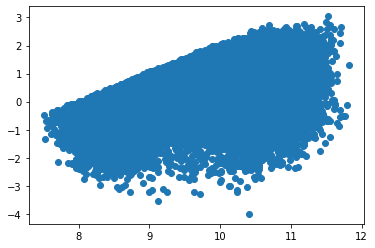

In [5]:
# Convert log10(M*) to linear units so that I can plot x,y logscale axes
x = data['logstellar_mass_median']
y = np.log10(data['sfr_100myr_median'])   # Convert to ensure we are plotting a log-log plot

plt.scatter(x,y)
plt.show()

This doesn't look so great -- it is a wall of solid points and we cannot see much.  The reason is because we are combining a very wide range of redshifts (and also using transparency for symbols helps).  Instead, we can plot and try two new things:  (1) change the axes to log-log and plot the linear values instead, and (2) add color-coding to the markers based on their redshift.  

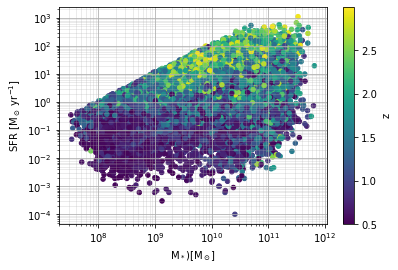

In [6]:
# Convert log10(M*) to linear units so that I can plot x,y logscale axes
x = 10**(data['logstellar_mass_median'])
y = data['sfr_100myr_median']
redshift = data['z']

# Plot x,y with axis labels
ax = plt.subplot(111)
im = ax.scatter(x,y,s=20,c=redshift,marker='o')  # The color-code here is redshift!
cbar = plt.colorbar(im)
cbar.set_label('z')

ax.set_xlabel("M$_*$)[M$_\odot$]")
ax.set_ylabel("SFR [M$_\odot$ yr$^{-1}$]")

# The following code makes the x and y axes logarithmic scale
ax.set_yscale('log')
ax.set_xscale('log')

# This command adds the minor grid lines also, with some transparency alpha
ax.grid(True,which='minor',alpha=0.3)  

plt.grid()
plt.show()

You can see above that there is a clear trend of increasing SFR for a given stellar mass as redshift increases.  Another plot that could be useful here is a hex plot.  Now we will try this and also split the data into three redshift bins to explore this redshift evolution of the SFR-stellar mass relation.

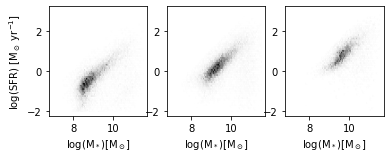

In [7]:
# First define three redshift bins of the data

x = data['logstellar_mass_median']
y = np.log10(data['sfr_100myr_median'])

x1 = x[(redshift>0.5)&(redshift<1.0)]
y1 = y[(redshift>0.5)&(redshift<1.0)]

x2 = x[(redshift>1.0)&(redshift<2.0)]
y2 = y[(redshift>1.0)&(redshift<2.0)]

x3 = x[(redshift>2.0)&(redshift<3.0)]
y3 = y[(redshift>2.0)&(redshift<3.0)]

# Now plot a hexbin 
fig,axs = plt.subplots(1,3)
extent=[7,11.5,-2,3]           

axs[0].hexbin(x1,y1,extent=extent,cmap='Greys')
axs[1].hexbin(x2,y2,extent=extent,cmap='Greys')
axs[2].hexbin(x3,y3,extent=extent,cmap='Greys')

axs[0].set_aspect('equal')
axs[1].set_aspect('equal')
axs[2].set_aspect('equal')

axs[0].set_ylabel("log(SFR) [M$_\odot$ yr$^{-1}$]") 

axs[0].set_xlabel("log(M$_*$)[M$_\odot$]")
axs[1].set_xlabel("log(M$_*$)[M$_\odot$]")
axs[2].set_xlabel("log(M$_*$)[M$_\odot$]")

plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams["figure.dpi"] = 100

plt.show()


---

**BEGINNING YOUR OWN DATA CHALLENGE**
---
---

Now it is time to begin your data challenge. Some suggestions to help you focus your data analysis include first ***clearly defining your sample in terms of stellar mass and redshift*** (and galaxy type if appropriate).  Make some preliminary plots and directly compare to the literature to be sure things look right.  If so, proceed to comparing to relations in the literature and making your own measurements.  

Refer to Module 2 for examples of fitting functions to data.  You will also see an example of how to overplot a best-fit function from the literature.  Hopefully this has helped you explore the catalogs and you can start-in on your own project with confidence.  We will work on this in-class, so please ask questions!


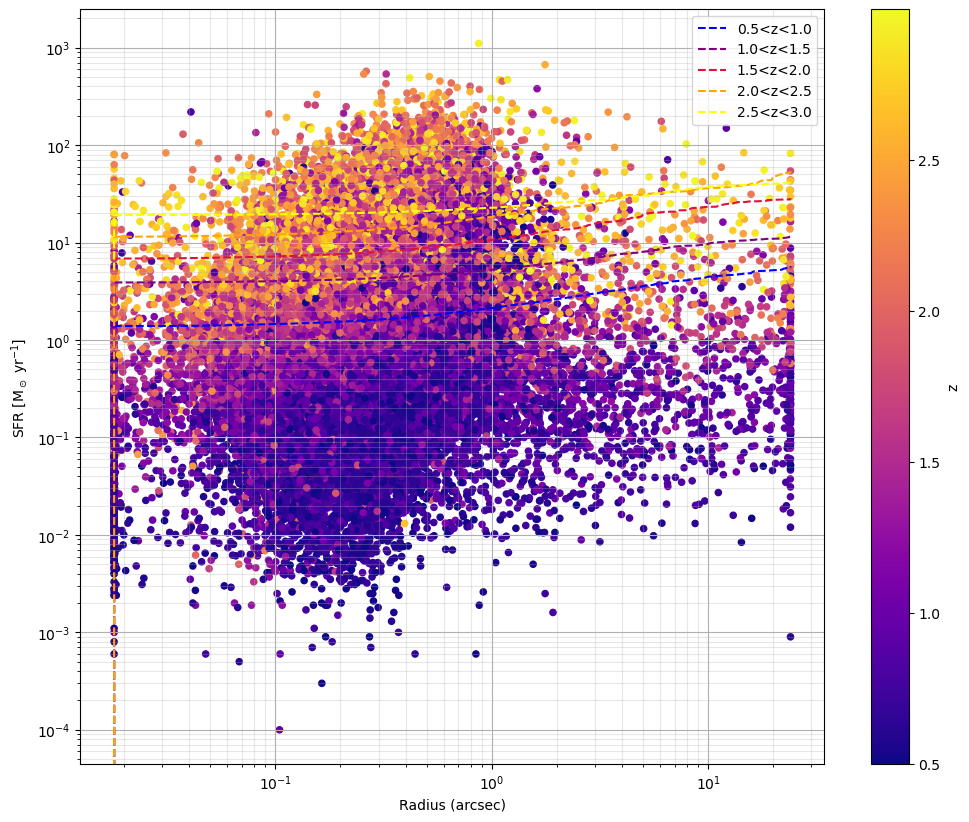

In [8]:
# Convert log10(M*) to linear units so that I can plot x,y logscale axes

xa = data['re']
x = xa[(xa > 0.)]
ya = data['sfr_100myr_median']
y = ya[(xa > 0.)]
redshifta = data['z']
redshift = redshifta[xa > 0.]



def fit(low,high):
  x1 = x[(redshift>low)&(redshift<high)&(x>0)] 
  y1_i = y[(redshift>low)&(redshift<high)&(x>0)] 

  a,b,c = np.polyfit(x1,y1_i,2)

  y1 = a*x1**2 + b*x1 + c     
                              
                                
  x1.sort()
  y1.sort()
  return x1,y1
x1,y1 = fit(0.5,1.0)
x2,y2 = fit(1.0,1.5)
x3,y3 = fit(1.5,2.0)
x4,y4 = fit(2.0,2.5)
x5,y5 = fit(2.5,3.0)
# Plot x,y with axis labels
ax = plt.subplot(111)
im = ax.scatter(x,y,s=20,c=redshift,marker='o', cmap='plasma')  # The color-code here is redshift!
cbar = plt.colorbar(im)
cbar.set_label('z')

ax.set_xlabel("Radius (arcsec)")
ax.set_ylabel("SFR [M$_\odot$ yr$^{-1}$]")

# The following code makes the x and y axes logarithmic scale
ax.set_yscale('log')
ax.set_xscale('log')
#plt.xlim([0,25])
plt.plot(x1,y1,'--',c='blue',label="0.5<z<1.0")
plt.plot(x2,y2,'--',c='purple',label="1.0<z<1.5")
plt.plot(x3,y3,'--',c='crimson',label="1.5<z<2.0")
plt.plot(x4,y4,'--',c='orange',label="2.0<z<2.5")
plt.plot(x5,y5,'--',c='yellow',label="2.5<z<3.0")
ax.legend()
# This command adds the minor grid lines also, with some transparency alpha
ax.grid(True,which='minor',alpha=0.3)  

plt.grid()
plt.show()



For 0.5 < z < 1.0, Parameters: a = 0.27312, b = -3.45502, c = 10.32982, d = -2.41258, e = 0.73075
For 1.0 < z < 1.5, Parameters: a = -2.88053, b = 6.57220, c = 2.96653, d = 3.71301, e = 0.92503
For 1.5 < z < 2.0, Parameters: a = -1.75932, b = 8.09861, c = -1.23572, d = 10.07466, e = 1.55847
For 2.0 < z < 2.5, Parameters: a = 4.16896, b = -10.71604, c = 20.50061, d = 11.13867, e = 3.40509
For 2.5 < z < 3.0, Parameters: a = -29.71085, b = 122.55528, c = -138.92082, d = 67.62791, e = 1.76640


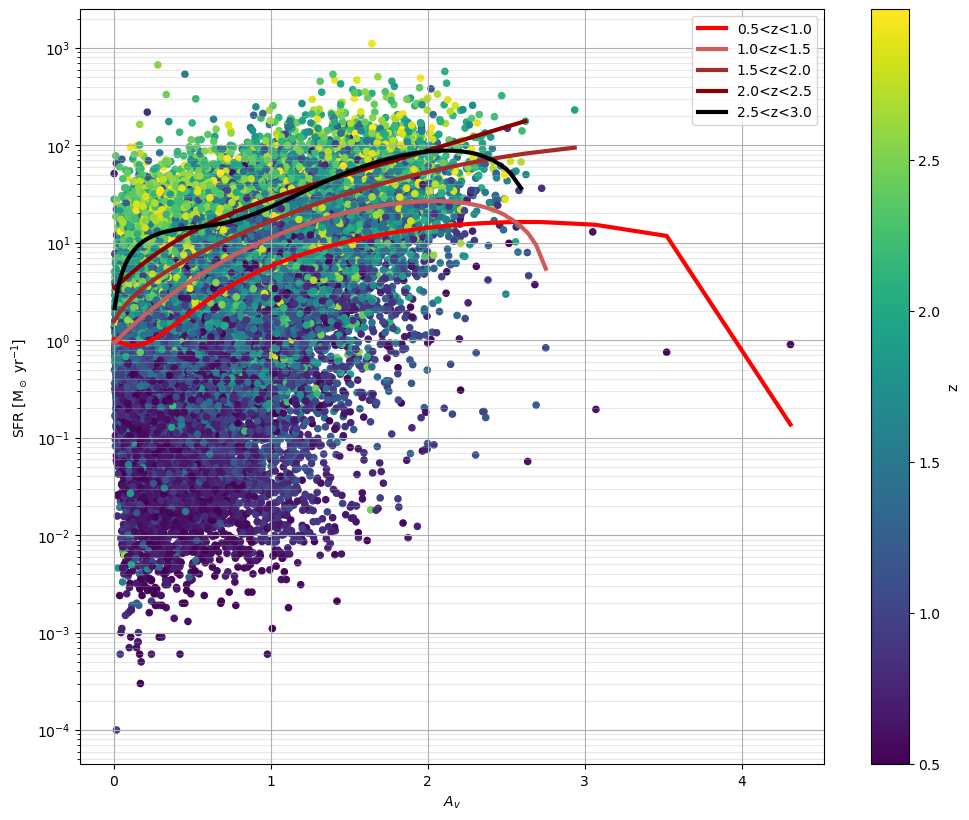

In [9]:
a1 = data['sfr_100myr_median']
b1 = data['z']
dust = 1.086*data['tau_dust_median']

import operator
    
def fit(low,high):
    x1 = dust[(b1>low)&(b1<high)] 
    y1_i = a1[(b1>low)&(b1<high)] 

    a,b,c,d,e = np.polyfit(x1,y1_i,4)

    y1 = a*x1**4 + b*x1**3 + c*x1**2 + d*x1 + e
                              
    L = sorted(zip(x1,y1), key=operator.itemgetter(0))
    new_x, new_y = zip(*L)
    new_x = np.asarray(new_x)
    new_y = np.asarray(new_y)
    print("For %.1f < z < %.1f, Parameters: a = %.5f, b = %.5f, c = %.5f, d = %.5f, e = %.5f"%(low,high,a,b,c,d,e))
    return new_x,new_y

x1,y1 = fit(0.5,1.0)

x2,y2 = fit(1.0,1.5)
x3,y3 = fit(1.5,2.0)
x4,y4 = fit(2.0,2.5)
x5,y5 = fit(2.5,3.0)

ax = plt.subplot(111)
im = ax.scatter(dust,a1,s=20,c=b1,marker='o', cmap='viridis')  # The color-code here is redshift!
cbar = plt.colorbar(im)
cbar.set_label('z')

ax.set_xlabel("$A_v$")
ax.set_ylabel("SFR [M$_\odot$ yr$^{-1}$]")
ax.set_yscale('log')
ax.set_xscale('linear')


plt.plot(x1,y1+.3,'-',c='red',label="0.5<z<1.0",linewidth=3.0)
plt.plot(x2,y2,'-',c='indianred',label="1.0<z<1.5",linewidth=3.0)
plt.plot(x3,y3,'-',c='brown',label="1.5<z<2.0",linewidth=3.0)
plt.plot(x4,y4,'-',c='darkred',label="2.0<z<2.5",linewidth=3.0)
plt.plot(x5,y5,'-',c='black',label="2.5<z<3.0",linewidth=3.0)

ax.legend()
ax.grid(True,which='minor',alpha=0.3)  

plt.grid()
plt.show()


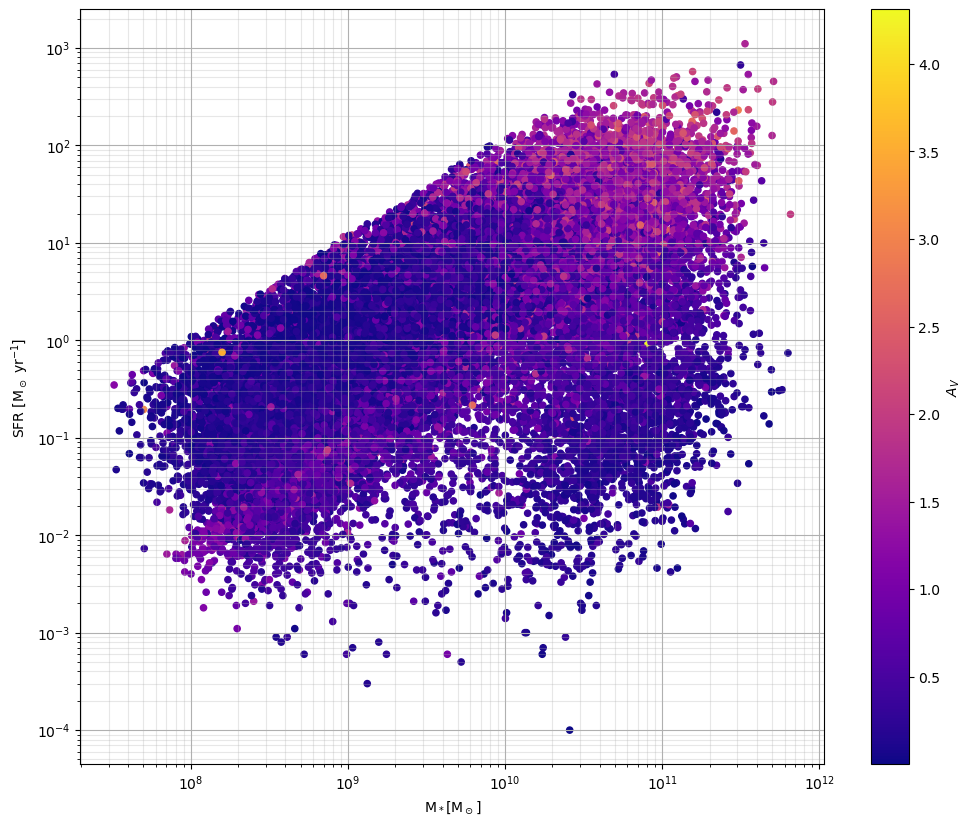

In [10]:
a2 = data['sfr_100myr_median']
b2 = 10**(data['logstellar_mass_median'])
dust = 1.086*data['tau_dust_median']

ax = plt.subplot(111)
im = ax.scatter(b2,a2,s=20,c=dust,marker='o', cmap='plasma')  # The color-code here is redshift!
cbar = plt.colorbar(im)
cbar.set_label('$A_V$')

ax.set_xlabel("M$_*$[M$_\odot$]")
ax.set_ylabel("SFR [M$_\odot$ yr$^{-1}$]")
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid(True,which='minor',alpha=0.3)  

plt.grid()
plt.show()

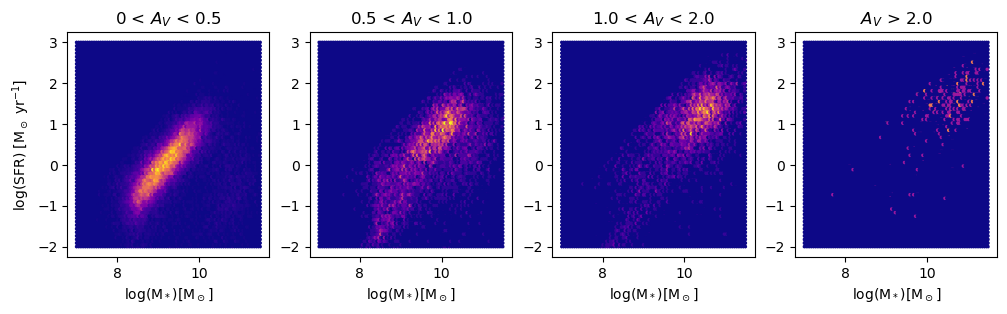

In [11]:
# First define three redshift bins of the data

x = data['logstellar_mass_median']
y = np.log10(data['sfr_100myr_median'])

x1 = x[(dust>0.)&(dust<0.5)]
y1 = y[(dust>0.)&(dust<0.5)]

x2 = x[(dust>0.5)&(dust<1.0)]
y2 = y[(dust>0.5)&(dust<1.0)]

x3 = x[(dust>1.0)&(dust<2.0)]
y3 = y[(dust>1.0)&(dust<2.0)]

x4 = x[(dust>2.0)]
y4 = y[(dust>2.0)]

fig,axs = plt.subplots(1,4)
extent=[7,11.5,-2,3]           

axs[0].hexbin(x1,y1,extent=extent,cmap='plasma')
axs[1].hexbin(x2,y2,extent=extent,cmap='plasma')
axs[2].hexbin(x3,y3,extent=extent,cmap='plasma')
axs[3].hexbin(x4,y4,extent=extent,cmap='plasma')

axs[0].set_aspect('equal')
axs[1].set_aspect('equal')
axs[2].set_aspect('equal')
axs[3].set_aspect('equal')

axs[0].set_title("0 < $A_V$ < 0.5")
axs[1].set_title("0.5 < $A_V$ < 1.0")
axs[2].set_title("1.0 < $A_V$ < 2.0")
axs[3].set_title("$A_V$ > 2.0")

axs[0].set_ylabel("log(SFR) [M$_\odot$ yr$^{-1}$]") 

axs[0].set_xlabel("log(M$_*$)[M$_\odot$]")
axs[1].set_xlabel("log(M$_*$)[M$_\odot$]")
axs[2].set_xlabel("log(M$_*$)[M$_\odot$]")
axs[3].set_xlabel("log(M$_*$)[M$_\odot$]")

plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams["figure.dpi"] = 100

plt.show()

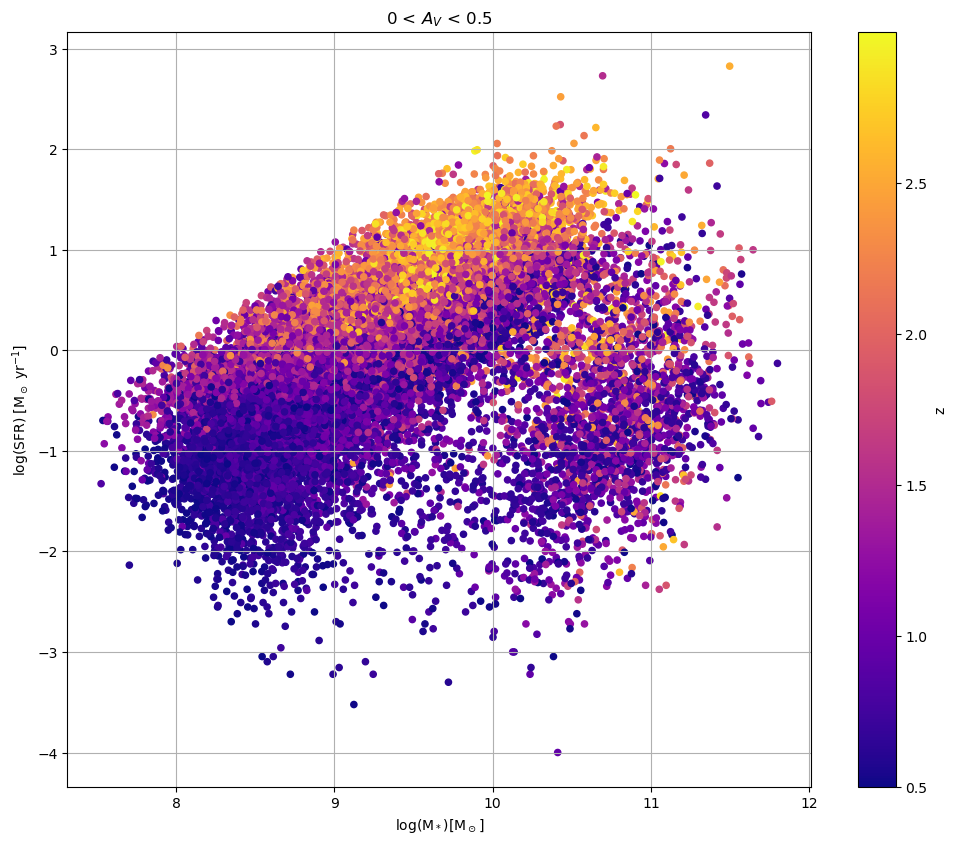

0.17174125040632787


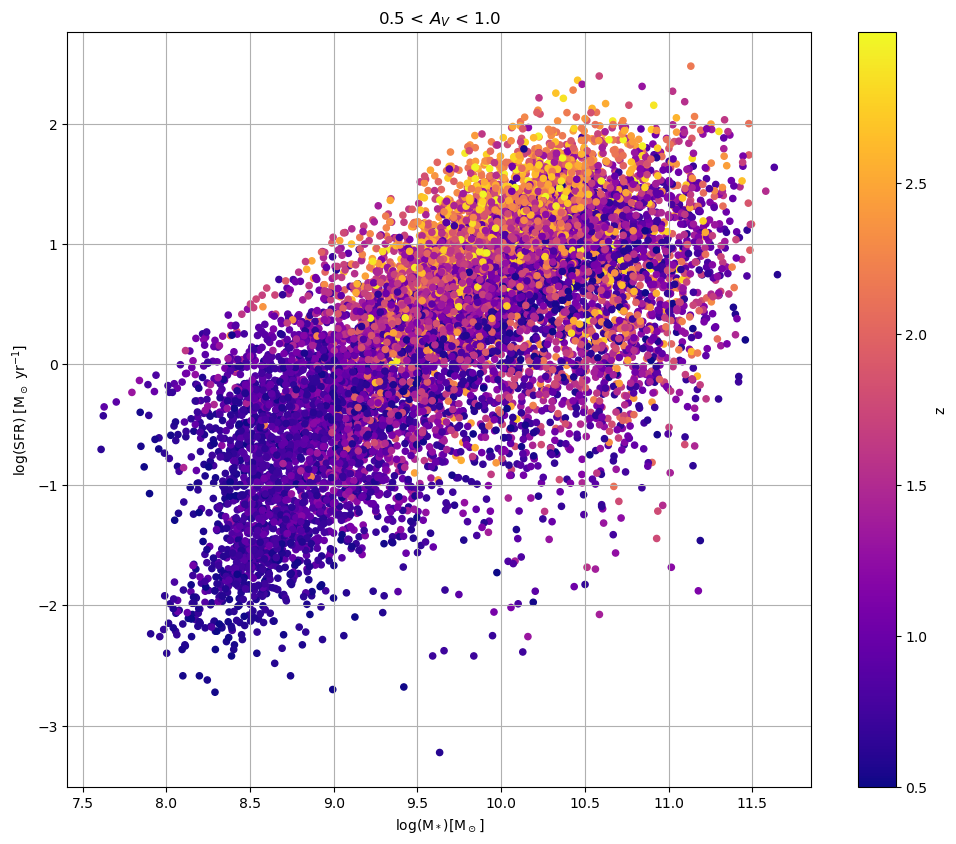

0.17387551548863528


In [12]:
z1 = b1[(dust>0.)&(dust<0.5)]

ax = plt.subplot(111)
im = ax.scatter(x1,y1,s=20,c=z1,marker='o', cmap='plasma')  # The color-code here is redshift!
cbar = plt.colorbar(im)
cbar.set_label('z')

ax.set_xlabel("log(M$_*$)[M$_\odot$]")
ax.set_ylabel("log(SFR) [M$_\odot$ yr$^{-1}$]")
ax.set_title("0 < $A_V$ < 0.5")
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.grid(True,which='minor',alpha=0.3)  

plt.grid()
plt.show()

z1_ratio = z1[z1>2]
print(len(z1_ratio)/len(z1))

z2 = b1[(dust>0.5)&(dust<1.0)]

ax = plt.subplot(111)
im = ax.scatter(x2,y2,s=20,c=z2,marker='o', cmap='plasma')  # The color-code here is redshift!
cbar = plt.colorbar(im)
cbar.set_label('z')

ax.set_xlabel("log(M$_*$)[M$_\odot$]")
ax.set_ylabel("log(SFR) [M$_\odot$ yr$^{-1}$]")
ax.set_title("0.5 < $A_V$ < 1.0")
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.grid(True,which='minor',alpha=0.3)  

plt.grid()
plt.show()

z2_ratio = z2[z2>2]
print(len(z2_ratio)/len(z2))


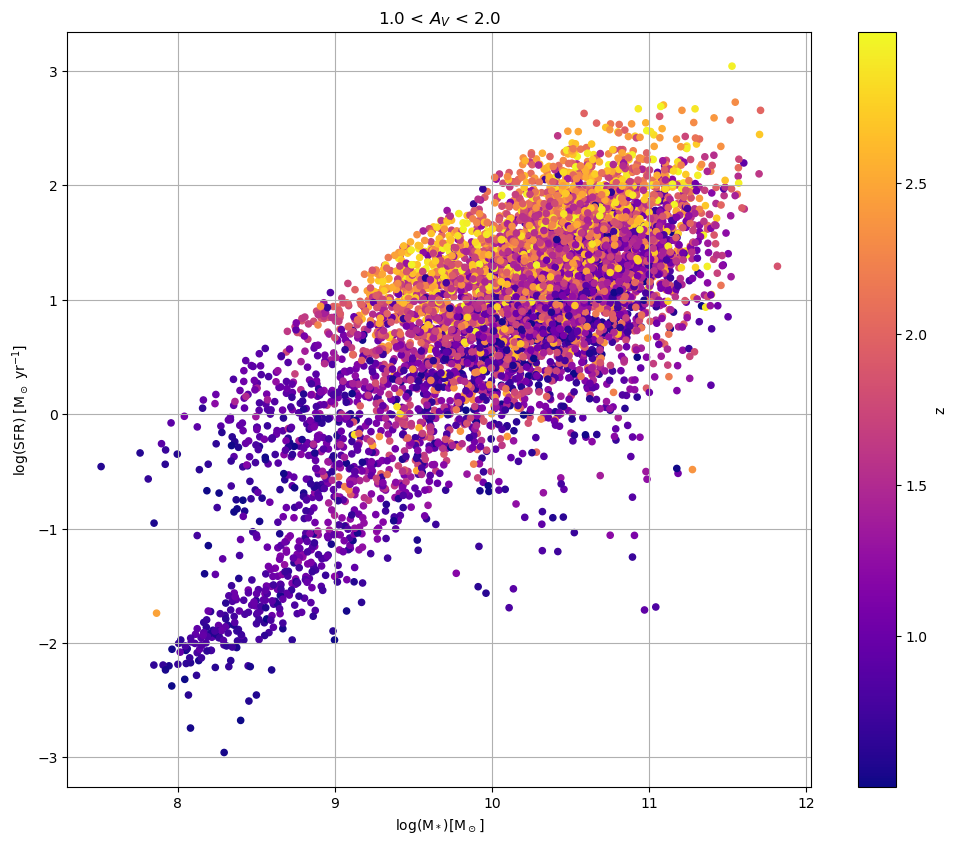

0.261805876019074


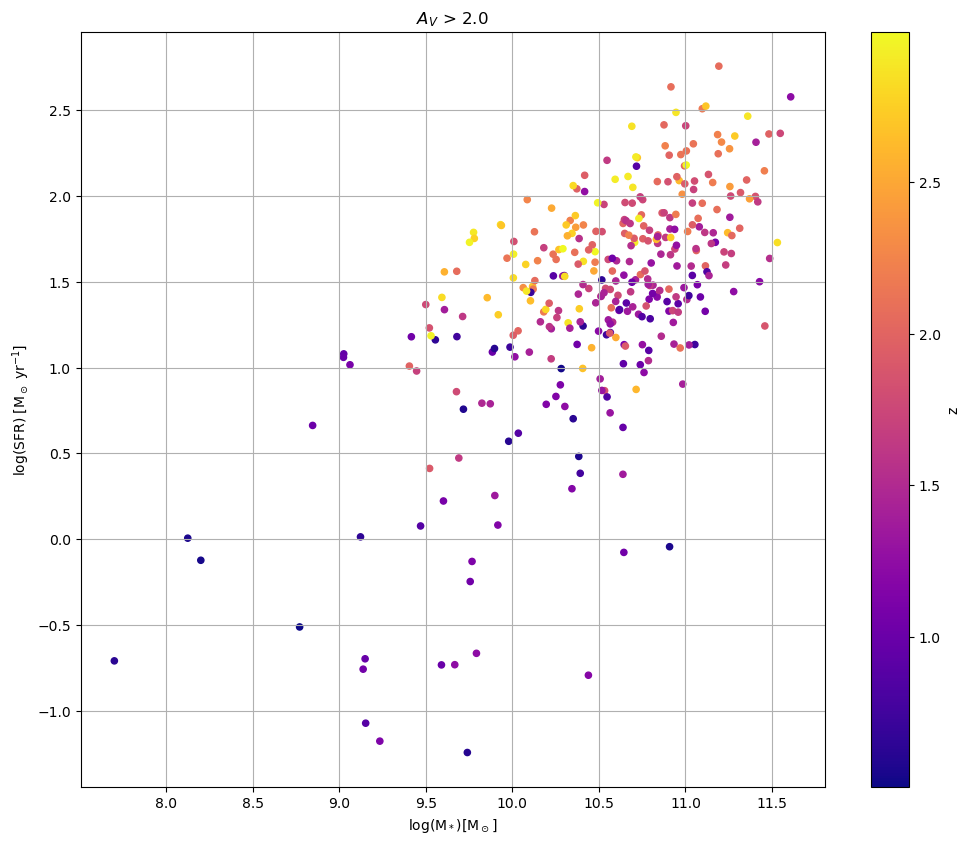

0.3176470588235294


In [13]:

z3 = b1[(dust>1.0)&(dust<2.0)]

ax = plt.subplot(111)
im = ax.scatter(x3,y3,s=20,c=z3,marker='o', cmap='plasma')  # The color-code here is redshift!
cbar = plt.colorbar(im)
cbar.set_label('z')

ax.set_xlabel("log(M$_*$)[M$_\odot$]")
ax.set_ylabel("log(SFR) [M$_\odot$ yr$^{-1}$]")
ax.set_title("1.0 < $A_V$ < 2.0")
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.grid(True,which='minor',alpha=0.3)  

plt.grid()
plt.show()

z3_ratio = z3[z3>2]
print(len(z3_ratio)/len(z3))


z4 = b1[(dust>2.0)]

ax = plt.subplot(111)
im = ax.scatter(x4,y4,s=20,c=z4,marker='o', cmap='plasma')  # The color-code here is redshift!
cbar = plt.colorbar(im)
cbar.set_label('z')

ax.set_xlabel("log(M$_*$)[M$_\odot$]")
ax.set_ylabel("log(SFR) [M$_\odot$ yr$^{-1}$]")
ax.set_title("$A_V$ > 2.0")
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.grid(True,which='minor',alpha=0.3)  

plt.grid()
plt.show()

z4_ratio = z4[z4>2]
print(len(z4_ratio)/len(z4))

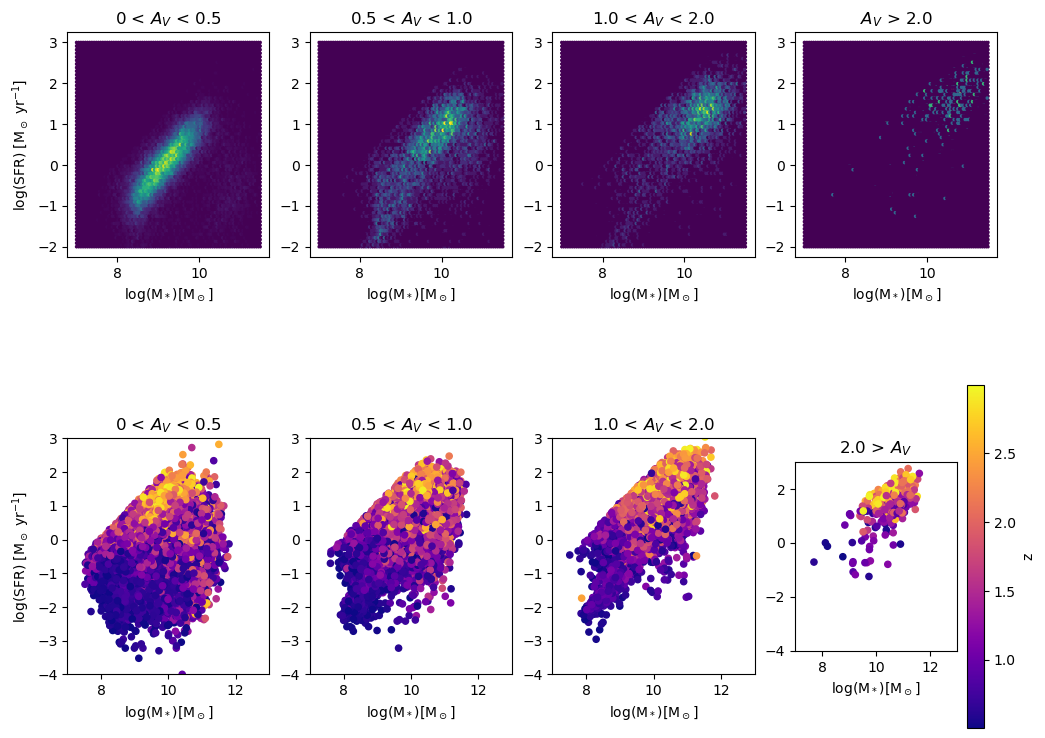

In [14]:
# First define three redshift bins of the data

x = data['logstellar_mass_median']
y = np.log10(data['sfr_100myr_median'])

x1 = x[(dust>0.)&(dust<0.5)]
y1 = y[(dust>0.)&(dust<0.5)]

x2 = x[(dust>0.5)&(dust<1.0)]
y2 = y[(dust>0.5)&(dust<1.0)]

x3 = x[(dust>1.0)&(dust<2.0)]
y3 = y[(dust>1.0)&(dust<2.0)]

x4 = x[(dust>2.0)]
y4 = y[(dust>2.0)]

fig,axs = plt.subplots(2,4)
extent=[7,11.5,-2,3]           

axs[0,0].hexbin(x1,y1,extent=extent,cmap='viridis')
axs[0,1].hexbin(x2,y2,extent=extent,cmap='viridis')
axs[0,2].hexbin(x3,y3,extent=extent,cmap='viridis')
axs[0,3].hexbin(x4,y4,extent=extent,cmap='viridis')

z1 = b1[(dust>0.)&(dust<0.5)]
axs[1,0].scatter(x1,y1,s=20,c=z1,marker='o', cmap='plasma')
axs[1,0].set_xlabel("log(M$_*$)[M$_\odot$]")
axs[1,0].set_ylabel("log(SFR) [M$_\odot$ yr$^{-1}$]")
axs[1,0].set_title("0 < $A_V$ < 0.5")
axs[1,0].set_yscale('linear')
axs[1,0].set_xscale('linear')
axs[1,0].grid(True,which='minor',alpha=0.3)
axs[1,0].set_xlim([7,13])
axs[1,0].set_ylim([-4,3])
axs[1,0].set_aspect('equal')

z2 = b1[(dust>0.5)&(dust<1.0)]
axs[1,1].scatter(x2,y2,s=20,c=z2,marker='o', cmap='plasma')
axs[1,1].set_xlabel("log(M$_*$)[M$_\odot$]")
axs[1,1].set_title("0.5 < $A_V$ < 1.0")
axs[1,1].set_yscale('linear')
axs[1,1].set_xscale('linear')
axs[1,1].grid(True,which='minor',alpha=0.3)
axs[1,1].set_xlim([7,13])
axs[1,1].set_ylim([-4,3])
axs[1,1].set_aspect('equal')

z3 = b1[(dust>1.0)&(dust<2.0)]
axs[1,2].scatter(x3,y3,s=20,c=z3,marker='o', cmap='plasma')
axs[1,2].set_xlabel("log(M$_*$)[M$_\odot$]")
axs[1,2].set_title("1.0 < $A_V$ < 2.0")
axs[1,2].set_yscale('linear')
axs[1,2].set_xscale('linear')
axs[1,2].grid(True,which='minor',alpha=0.3)
axs[1,2].set_xlim([7,13])
axs[1,2].set_ylim([-4,3])
axs[1,2].set_aspect('equal')

z4 = b1[(dust>2.0)]
im = axs[1,3].scatter(x4,y4,s=20,c=z4,marker='o', cmap='plasma')
cbar = plt.colorbar(im)
cbar.set_label('z')
axs[1,3].set_xlabel("log(M$_*$)[M$_\odot$]")
axs[1,3].set_title("2.0 > $A_V$")
axs[1,3].set_yscale('linear')
axs[1,3].set_xscale('linear')
axs[1,3].grid(True,which='minor',alpha=0.3)
axs[1,3].set_xlim([7,13])
axs[1,3].set_ylim([-4,3])
axs[1,3].set_aspect('equal')


axs[0,0].set_aspect('equal')
axs[0,1].set_aspect('equal')
axs[0,2].set_aspect('equal')
axs[0,3].set_aspect('equal')

axs[0,0].set_title("0 < $A_V$ < 0.5")
axs[0,1].set_title("0.5 < $A_V$ < 1.0")
axs[0,2].set_title("1.0 < $A_V$ < 2.0")
axs[0,3].set_title("$A_V$ > 2.0")

axs[0,0].set_ylabel("log(SFR) [M$_\odot$ yr$^{-1}$]") 

axs[0,0].set_xlabel("log(M$_*$)[M$_\odot$]")
axs[0,1].set_xlabel("log(M$_*$)[M$_\odot$]")
axs[0,2].set_xlabel("log(M$_*$)[M$_\odot$]")
axs[0,3].set_xlabel("log(M$_*$)[M$_\odot$]")

plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.dpi"] = 100

plt.show()

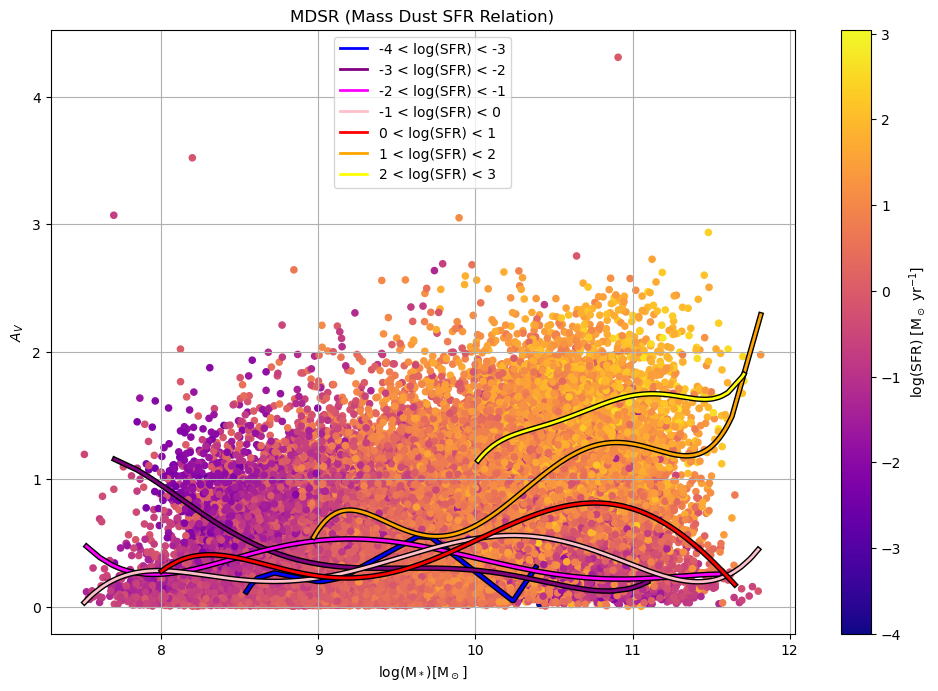

In [15]:
xb = data['logstellar_mass_median']
yb = 1.086*data['tau_dust_median']
zb = np.log10(data['sfr_100myr_median'])

w = data['z']
#xb = xb[(w>0.)&(w<0.7)]
#yb = yb[(w>0.)&(w<0.7)]
#zb = zb[(w>0.)&(w<0.7)]

def fitb(low,high):
    xba = xb[(zb>low)&(zb<high)] 
    yba = yb[(zb>low)&(zb<high)] 

    a,b,c,d,e,f = np.polyfit(xba,yba,5)

    yba2 = a*xba**5 + b*xba**4 + c*xba**3 + d*xba**2 + e*xba + f
                              
    L = sorted(zip(xba,yba2), key=operator.itemgetter(0))
    new_x, new_y = zip(*L)
    new_x = np.asarray(new_x)
    new_y = np.asarray(new_y)
    return new_x, new_y

ax = plt.subplot(111)
im = ax.scatter(xb,yb,s=20,c=zb,marker='o', cmap='plasma')  # The color-code here is redshift!
cbar = plt.colorbar(im)
cbar.set_label('log(SFR) [M$_\odot$ yr$^{-1}$]')

ax.set_xlabel("log(M$_*$)[M$_\odot$]")
ax.set_ylabel("$A_V$")
ax.set_title("MDSR (Mass Dust SFR Relation)")
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.grid(True,which='minor',alpha=0.3)  

x_place, y_place = fitb(-4,-3)
plt.plot(x_place,y_place,'-',c='black',linewidth=4.0)
plt.plot(x_place,y_place,'-',c='blue',label="%1.f < log(SFR) < %1.f"%((-4),(-3)),linewidth=2.0)

x_place, y_place = fitb(-3,-2)
plt.plot(x_place,y_place,'-',c='black',linewidth=4.0)
plt.plot(x_place,y_place,'-',c='purple',label="%1.f < log(SFR) < %1.f"%((-3),(-2)),linewidth=2.0)

x_place, y_place = fitb(-2,-1)
plt.plot(x_place,y_place,'-',c='black',linewidth=4.0)
plt.plot(x_place,y_place,'-',c='magenta',label="%1.f < log(SFR) < %1.f"%((-2),(-1)),linewidth=2.0)

x_place, y_place = fitb(-1,0)
plt.plot(x_place,y_place,'-',c='black',linewidth=4.0)
plt.plot(x_place,y_place,'-',c='pink',label="%1.f < log(SFR) < %1.f"%((-1),(0)),linewidth=2.0)

x_place, y_place = fitb(0,1)
plt.plot(x_place,y_place,'-',c='black',linewidth=4.0)
plt.plot(x_place,y_place,'-',c='red',label="%1.f < log(SFR) < %1.f"%((0),(1)),linewidth=2.0)

x_place, y_place = fitb(1,2)
plt.plot(x_place,y_place,'-',c='black',linewidth=4.0)
plt.plot(x_place,y_place,'-',c='orange',label="%1.f < log(SFR) < %1.f"%((1),(2)),linewidth=2.0)

x_place, y_place = fitb(2,3)
plt.plot(x_place,y_place,'-',c='black',linewidth=4.0)
plt.plot(x_place,y_place,'-',c='yellow',label="%1.0f < log(SFR) < %1.f"%((2),(3)),linewidth=2.0)

ax.legend()
plt.grid()
plt.show()

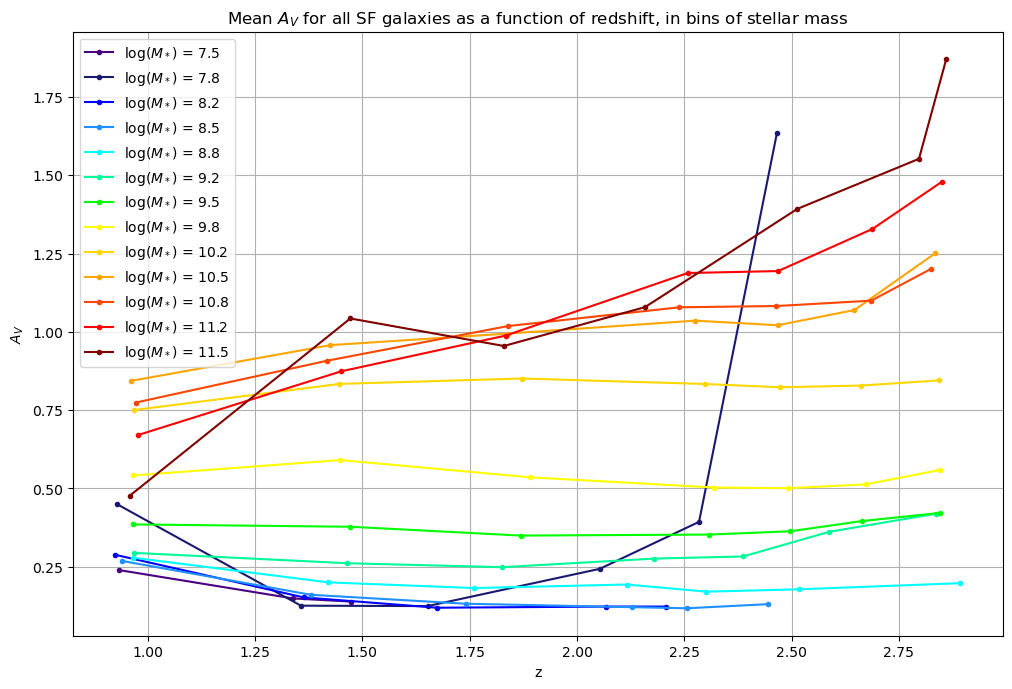

<Figure size 800x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [16]:
m_mini = min(xb)
m_max = max(xb)
m_delta = (m_max - m_mini)/13
z_mini = min(w)
z_maxi = max(w)
z_delta = (z_maxi-z_mini)/8

rows, cols = (8,2)
x_arr = np.zeros(8)
y_arr = np.zeros(8)

def average(l):
    if len(l) > 0:
        avg = sum(l) / len(l)
        return(avg)
    else:
        return
color = ['indigo','midnightblue','blue','dodgerblue','cyan','mediumspringgreen','lime','yellow','gold','orange','orangered','red','maroon']
for i in range(13):
    mini1 = m_mini + i*m_delta
    maxi1 = m_mini + (i+1)*m_delta
    for j in range(8):
        mini2 = z_mini + j*z_delta
        maxi2 = z_mini + j*2*z_delta
        xc1 = w[(xb > mini1)&(xb < maxi1)&(w>mini2)&(w<maxi2)]
        yc1 = yb[(xb > mini1)&(xb < maxi1)&(w>mini2)&(w<maxi2)]
        x = average(xc1)
        y = average(yc1)
        x_arr[j] = x
        y_arr[j] = y
    x_plot = x_arr
    y_plot = y_arr
    plt.plot(x_plot,y_plot,'.-',c=color[i],label="log($M_*$) = %.1f"%(mini1))
plt.xlabel("z")
plt.ylabel("$A_V$")
plt.title("Mean $A_V$ for all SF galaxies as a function of redshift, in bins of stellar mass")
plt.grid()
plt.legend()
plt.figure().set_figwidth(8)
plt.figure().set_figheight(8)
plt.show()


---


*This tutorial was created by K. Whitaker.  Use of this tutorial is allowed, but please retain proper credit.  Questions can be directed to <kwhitaker@astro.umass.edu>*